In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set_style("whitegrid")

In [311]:
df = pd.read_csv('lung_dataframe_overall3.csv',converters={'Combined': lambda x: str(x),'State-county recode_x': lambda x: str(x)})

In [312]:
for i in df.columns:
    print(i)

State-county recode_x
2000_x
2001_x
2002_x
2003_x
2004_x
2005_x
2006_x
2007_x
2008_x
2009_x
2010_x
2011_x
2012_x
2013_x
2014_x
2000_y_x
2001_y_x
2002_y_x
2003_y_x
2004_y_x
2005_y_x
2006_y_x
2007_y_x
2008_y_x
2009_y_x
2010_y_x
2011_y_x
2012_y_x
2013_y_x
2014_y_x
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2000_y_y
2001_y_y
2002_y_y
2003_y_y
2004_y_y
2005_y_y
2006_y_y
2007_y_y
2008_y_y
2009_y_y
2010_y_y
2011_y_y
2012_y_y
2013_y_y
2014_y_y
2000cancer_rate
2001cancer_rate
2002cancer_rate
2003cancer_rate
2004cancer_rate
2005cancer_rate
2006cancer_rate
2007cancer_rate
2008cancer_rate
2009cancer_rate
2010cancer_rate
2011cancer_rate
2012cancer_rate
2013cancer_rate
2014cancer_rate
County
State
State_and_county
1996_smoking
1997_smoking
1998_smoking
1999_smoking
2000_smoking
2001_smoking
2002_smoking
2003_smoking
2004_smoking
2005_smoking
2006_smoking
2007_smoking
2008_smoking
2009_smoking
2010_smoking
2011_smoking
2012_smoking
2001_air
2002_air
2003_air
2004_air
2

In [320]:
df.iloc[:,30:].head()
# df.head()

,2014_y_x,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2003_air,2004_air,2005_air,2006_air,2007_air,2008_air,2009_air,2010_air,2011_air,radon_mean
0,1478621.0,256.948125,220.412857,241.838637,237.896807,210.981594,224.620464,217.689619,221.162327,208.168637,...,12.459122,11.617424,11.197772,11.763339,11.182633,13.056139,10.936849,9.255255,10.494480,0.798333
1,30819.0,475.052662,522.032304,397.002217,503.177227,397.829718,621.313245,475.618972,390.612439,554.086301,...,12.301152,11.760466,11.287103,11.823173,10.740916,12.299932,9.686501,7.934685,8.712184,1.440000
2,198402.0,443.476873,411.880613,410.529294,351.019291,366.106942,356.642445,405.208653,365.482329,423.190121,...,11.744747,11.366081,10.858977,11.083041,10.470951,14.972811,9.251522,7.670181,9.071313,0.486364
3,37418.0,486.066042,422.499523,472.146825,370.495477,445.403077,372.901570,487.279216,445.679400,290.040157,...,12.339021,11.399416,10.832450,11.380721,10.407938,11.818147,9.392393,7.964309,8.642155,1.188889
4,6599.0,72.411296,89.094797,52.789020,103.644844,149.452009,81.208381,47.846890,94.667087,31.397174,...,10.772772,9.612164,9.264893,10.160168,8.243028,11.858425,7.971614,6.340477,7.517102,0.550000


In [282]:
large_counties = df[df.iloc[:,30]>500000]
medium_counties = df[(df.iloc[:,30]<=500000)&(df.iloc[:,30]>50000)]
small_counties = df[df.iloc[:,30]<50000]
print(large_counties.shape)
print(medium_counties.shape)
print(small_counties.shape)

(26, 108)
(102, 108)
(279, 108)


In [283]:
population = df.iloc[:,16:31]
population.index = df.iloc[:,0]
population.head()

,2000_y_x,2001_y_x,2002_y_x,2003_y_x,2004_y_x,2005_y_x,2006_y_x,2007_y_x,2008_y_x,2009_y_x,2010_y_x,2011_y_x,2012_y_x,2013_y_x,2014_y_x
State-county recode_x,,,,,,,,,,,,,,,
06001,1341378.0,1361172.0,1353922.0,1345769.0,1337576.0,1332568.0,1335475.0,1345284.0,1365688.0,1384895.0,1397829.0,1413326.0,1433921.0,1455515.0,1478621.0
06005,30505.0,31052.0,31791.0,32199.0,32606.0,33166.0,33471.0,33796.0,33206.0,33016.0,32515.0,32144.0,31543.0,30873.0,30819.0
06007,179171.0,181599.0,184822.0,187340.0,189096.0,190727.0,192959.0,193629.0,195147.0,195839.0,195931.0,195814.0,196563.0,197081.0,198402.0
06009,35598.0,36181.0,37167.0,38458.0,39137.0,39796.0,40447.0,40475.0,40262.0,39770.0,39177.0,38621.0,38076.0,37612.0,37418.0
06011,5524.0,5612.0,5683.0,5789.0,6022.0,6157.0,6270.0,6338.0,6370.0,6414.0,6537.0,6535.0,6616.0,6637.0,6599.0


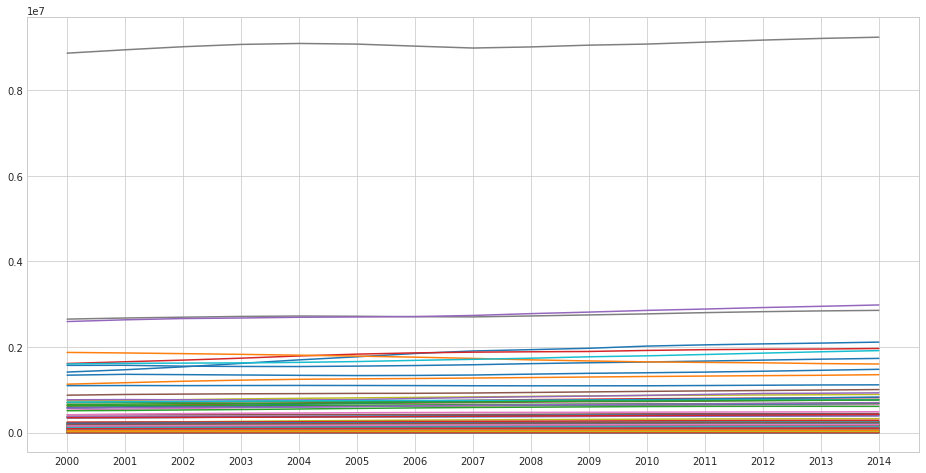

In [284]:
fig = plt.subplots(figsize=(16,8))
for row in population.values:
    plt.plot_date(x=[i for i in population.columns.str[:4]], y=row, fmt="-")

In [285]:
#sns.distplot(population.iloc[:,14])
#population.iloc[:,14].sort_values(ascending=False)

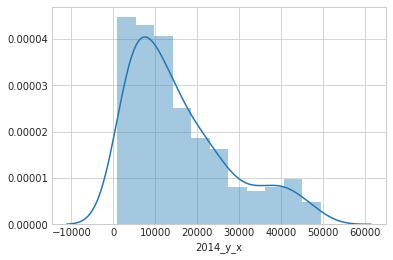

In [286]:
sns.distplot(small_counties.iloc[:,30])

In [294]:
cancer_rates = df.iloc[:,61:76]
cancer_rates.index = df.iloc[:,0]
cancer_rates['mean'] = cancer_rates.iloc[:,1:].mean(axis=1)
cancer_rates['State'] = df.State.values
cancer_rates['County'] = df.County.values
cancer_rates['State_and_county'] = df.State_and_county.values
#cancer_rates[cancer_rates.State=='KY']
df[df.State=='KY'].iloc[:,61:76]

,cancer_rate2000,cancer_rate2001,cancer_rate2002,cancer_rate2003,cancer_rate2004,cancer_rate2005,cancer_rate2006,cancer_rate2007,cancer_rate2008,cancer_rate2009,cancer_rate2010,cancer_rate2011,cancer_rate2012,cancer_rate2013,cancer_rate2014
262,86.570093,147.861692,118.229929,89.265789,116.705569,110.326567,87.264794,118.963932,102.475595,112.125581,128.054637,147.539256,89.799799,94.265515,72.878709
263,95.398429,133.727085,93.309183,113.919931,133.696989,105.764146,88.210876,97.236438,90.734953,95.906315,64.892927,104.109861,123.566627,113.423415,127.419750
264,99.211529,51.594263,56.950557,46.144381,106.523283,135.087807,68.229446,71.431973,42.678300,60.952738,69.936591,120.660850,23.084026,105.839584,105.224632
265,60.211946,97.264438,73.493386,48.461352,72.797865,36.280082,158.459288,48.840049,60.496068,97.513408,84.776553,84.449270,96.257971,24.163344,36.509675
266,110.155266,116.831529,118.850765,125.114901,116.158683,128.968254,119.930489,94.123326,138.765940,130.421380,106.822390,155.759564,147.731270,151.176854,139.127209
267,134.795111,141.843972,70.156976,105.005250,61.151393,112.671174,121.128223,104.620750,154.546235,164.587665,111.982083,119.586572,152.516523,141.619460,156.083135
268,149.925037,155.610433,107.776767,108.555533,126.387703,133.882595,100.138122,166.701396,162.990706,136.044930,114.942529,178.103719,130.987361,114.404204,176.576577
269,74.620012,64.246707,51.434266,72.403806,67.445597,57.844030,67.706665,69.451865,68.539501,62.999634,87.967695,72.458398,69.191759,83.065856,74.760409
270,98.110090,72.005349,107.958051,122.680570,116.556023,85.392807,100.964208,70.383591,64.850843,64.912368,120.349012,75.067561,95.071303,160.433170,65.039023
271,112.841800,116.947273,157.327847,114.563653,143.312745,139.667632,119.646334,120.030923,144.180002,131.680240,130.990287,115.363598,129.933409,116.547733,114.765857


In [295]:
# cancer_rates[cancer_rates.State=='KY']
ky = df[df.State=='KY']
ky.index = df[df.State=='KY'].County
for i in range(2000, 2015):
    ky[i] = (ky[str(i)+"_x"]/ky[str(i)+"_y_x"])*100000
#ky['2014_x'].sum()/ky['2014_y_x'].sum()*100000
ky[2014].mean()

/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


147.5224585512133

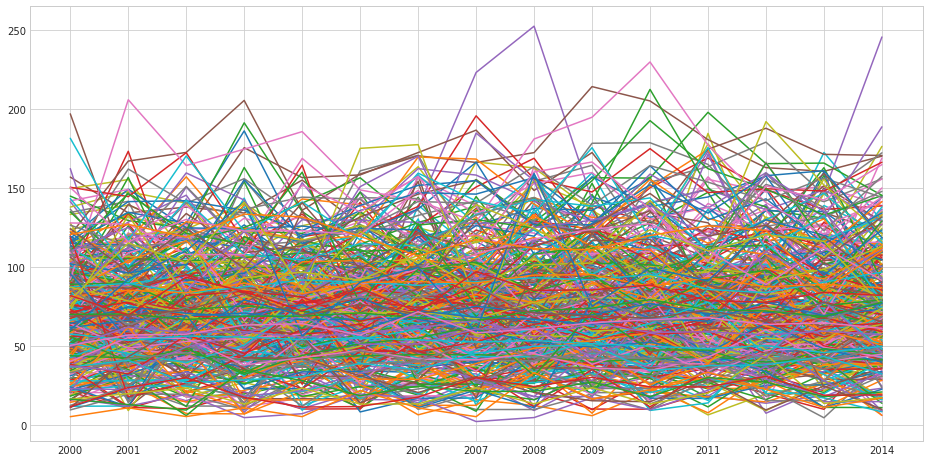

In [296]:
fig = plt.subplots(figsize=(16,8))
for row in cancer_rates.iloc[:,0:15].values:
    plt.plot_date(x=[i for i in cancer_rates.iloc[:,0:15].columns.str[11:]], y=row, fmt="-")

In [299]:
cancer_rates.loc[cancer_rates['mean'].idxmax()].State_and_county

'Floyd County, KY'

In [300]:
cancer_rates[cancer_rates.State=='KY']

,cancer_rate2000,cancer_rate2001,cancer_rate2002,cancer_rate2003,cancer_rate2004,cancer_rate2005,cancer_rate2006,cancer_rate2007,cancer_rate2008,cancer_rate2009,cancer_rate2010,cancer_rate2011,cancer_rate2012,cancer_rate2013,cancer_rate2014,mean,State,County,State_and_county
State-county recode_x,,,,,,,,,,,,,,,,,,,
21001,86.570093,147.861692,118.229929,89.265789,116.705569,110.326567,87.264794,118.963932,102.475595,112.125581,128.054637,147.539256,89.799799,94.265515,72.878709,109.696954,KY,Adair,"Adair County, KY"
21003,95.398429,133.727085,93.309183,113.919931,133.696989,105.764146,88.210876,97.236438,90.734953,95.906315,64.892927,104.109861,123.566627,113.423415,127.419750,106.137035,KY,Allen,"Allen County, KY"
21005,99.211529,51.594263,56.950557,46.144381,106.523283,135.087807,68.229446,71.431973,42.678300,60.952738,69.936591,120.660850,23.084026,105.839584,105.224632,76.024174,KY,Anderson,"Anderson County, KY"
21007,60.211946,97.264438,73.493386,48.461352,72.797865,36.280082,158.459288,48.840049,60.496068,97.513408,84.776553,84.449270,96.257971,24.163344,36.509675,72.840196,KY,Ballard,"Ballard County, KY"
21009,110.155266,116.831529,118.850765,125.114901,116.158683,128.968254,119.930489,94.123326,138.765940,130.421380,106.822390,155.759564,147.731270,151.176854,139.127209,127.841611,KY,Barren,"Barren County, KY"
21011,134.795111,141.843972,70.156976,105.005250,61.151393,112.671174,121.128223,104.620750,154.546235,164.587665,111.982083,119.586572,152.516523,141.619460,156.083135,122.678529,KY,Bath,"Bath County, KY"
21013,149.925037,155.610433,107.776767,108.555533,126.387703,133.882595,100.138122,166.701396,162.990706,136.044930,114.942529,178.103719,130.987361,114.404204,176.576577,136.650184,KY,Bell,"Bell County, KY"
21015,74.620012,64.246707,51.434266,72.403806,67.445597,57.844030,67.706665,69.451865,68.539501,62.999634,87.967695,72.458398,69.191759,83.065856,74.760409,69.251156,KY,Boone,"Boone County, KY"
21017,98.110090,72.005349,107.958051,122.680570,116.556023,85.392807,100.964208,70.383591,64.850843,64.912368,120.349012,75.067561,95.071303,160.433170,65.039023,94.404563,KY,Bourbon,"Bourbon County, KY"


In [301]:
smoking = df.iloc[:,79:89]
smoking.index = df.iloc[:,0]
smoking.head()

,1996_smoking,1997_smoking,1998_smoking,1999_smoking,2000_smoking,2001_smoking,2002_smoking,2003_smoking,2004_smoking,2005_smoking
State-county recode_x,,,,,,,,,,
06001,20.2,20.0,19.8,19.6,19.3,18.7,17.9,17.9,17.1,16.0
06005,23.8,23.7,23.6,23.3,23.0,23.3,23.2,24.0,24.4,24.3
06007,24.0,23.9,23.8,23.4,23.3,23.0,23.5,23.2,22.7,22.3
06009,23.3,23.2,23.2,22.8,22.3,22.6,21.9,22.6,22.8,22.9
06011,25.6,25.5,25.4,24.9,24.3,24.2,25.4,24.3,24.1,23.7


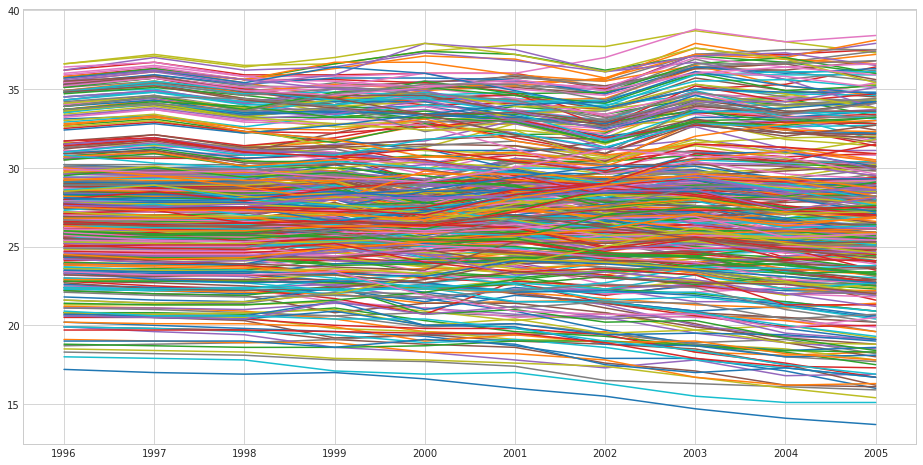

In [302]:
fig = plt.subplots(figsize=(16,8))
for row in smoking.values:
    plt.plot_date(x=[i for i in smoking.columns.str[:4]], y=row, fmt="-")

In [303]:
df_state = df.iloc[:,1:31]
df_state.index = df.State
df_state = pd.DataFrame(df_state.groupby(df_state.index)[df_state.columns].sum())
for i in range(2000, 2015):
    df_state[i] = (df_state[str(i)+"_x"]/df_state[str(i)+"_y_x"])*100000
    
df_state.head()

,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,2009_x,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
State,,,,,,,,,,,,,,,,,,,,,
CA,17485.0,17529.0,17428.0,17359.0,17387.0,17502.0,17541.0,17393.0,17267.0,17967.0,...,53.079141,52.908419,52.154405,51.301813,52.900212,50.334303,48.228593,48.393133,47.976329,47.771070
GA,4544.0,4685.0,4768.0,4763.0,4765.0,4923.0,5056.0,5311.0,5389.0,5509.0,...,69.345392,69.307118,71.158051,70.970283,71.684187,67.887919,69.741569,73.130613,71.051135,71.079697
IA,1843.0,1807.0,1846.0,1916.0,1880.0,1990.0,1981.0,1979.0,2008.0,2061.0,...,91.910788,90.726480,89.932430,90.470215,92.125690,88.895750,86.131619,86.002473,86.476045,86.955693
KY,3753.0,3857.0,3916.0,3910.0,3997.0,3985.0,4126.0,4162.0,4291.0,4315.0,...,114.974133,117.999365,117.891593,120.619632,120.524734,122.493602,116.885849,118.333125,121.519138,119.520589
MI,3110.0,3268.0,3208.0,3377.0,3217.0,3335.0,3316.0,3379.0,3414.0,3367.0,...,91.766470,91.833086,94.388533,96.273043,95.604249,95.141800,93.377117,90.336070,92.086280,94.195294


In [304]:
df_state_rates = df_state.iloc[:,31:]
df_state_rates.head(10)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
State,,,,,,,,,,,,,,
CA,55.247025,54.302503,53.499233,53.083275,53.079141,52.908419,52.154405,51.301813,52.900212,50.334303,48.228593,48.393133,47.976329,47.771070
GA,70.936128,70.934088,69.762615,68.422337,69.345392,69.307118,71.158051,70.970283,71.684187,67.887919,69.741569,73.130613,71.051135,71.079697
IA,85.283439,86.802127,89.645228,87.377364,91.910788,90.726480,89.932430,90.470215,92.125690,88.895750,86.131619,86.002473,86.476045,86.955693
KY,114.683877,115.719604,114.708203,116.329020,114.974133,117.999365,117.891593,120.619632,120.524734,122.493602,116.885849,118.333125,121.519138,119.520589
MI,88.822716,87.443777,92.221901,88.099285,91.766470,91.833086,94.388533,96.273043,95.604249,95.141800,93.377117,90.336070,92.086280,94.195294
NM,50.945331,53.998812,50.340958,53.036099,54.735868,52.614284,54.551216,54.473990,51.606069,50.550129,50.751672,53.123073,52.732363,52.204735
WA,69.348385,70.741529,71.603997,69.786568,69.930373,70.667932,70.444595,69.177307,70.363938,70.396695,67.812078,68.195641,65.733128,68.912714


Text(0,0.5,'Rates per 100,000')

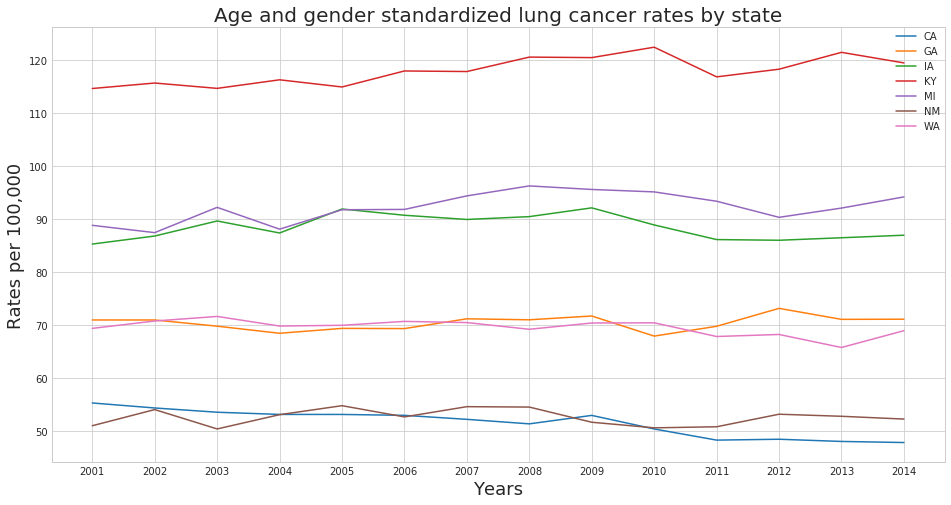

In [305]:
fig = plt.subplots(figsize=(16,8))
for row in df_state_rates.values:
    plt.plot_date(x=[str(i) for i in df_state_rates.columns], y=row, fmt="-")
plt.legend(df_state_rates.index, loc=1, borderaxespad=0.)
plt.title('Age and gender standardized lung cancer rates by state', fontsize = 20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Rates per 100,000', fontsize=18)

In [306]:
# fig = plt.subplots(figsize=(16,8))
# for row in df_state_rates.values:
#     plt.plot_date(x=[str(i) for i in df_state_rates.columns], y=row, fmt="-")

In [307]:
print ('MI counties: '+str(cancer_rates[cancer_rates['State']=='MI']['mean'].count()))
print ('CA counties: '+str(cancer_rates[cancer_rates['State']=='CA']['mean'].count()))
print ('KY counties: '+str(cancer_rates[cancer_rates['State']=='KY']['mean'].count()))
print ('GA counties: '+str(cancer_rates[cancer_rates['State']=='GA']['mean'].count()))
print ('NM counties: '+str(cancer_rates[cancer_rates['State']=='NM']['mean'].count()))
print ('IA counties: '+str(cancer_rates[cancer_rates['State']=='IA']['mean'].count()))
print ('WA counties: '+str(cancer_rates[cancer_rates['State']=='WA']['mean'].count()))

MI counties: 3
CA counties: 55
KY counties: 107
GA counties: 124
NM counties: 23
IA counties: 83
WA counties: 12


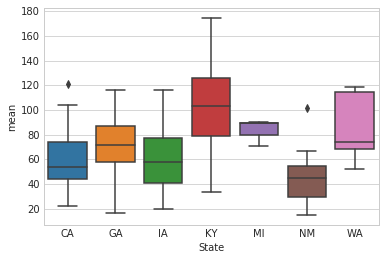

In [308]:
sns.boxplot(x='State', y='mean', data=cancer_rates)

In [309]:
cancer_rates[cancer_rates.State=='KY']

,cancer_rate2000,cancer_rate2001,cancer_rate2002,cancer_rate2003,cancer_rate2004,cancer_rate2005,cancer_rate2006,cancer_rate2007,cancer_rate2008,cancer_rate2009,cancer_rate2010,cancer_rate2011,cancer_rate2012,cancer_rate2013,cancer_rate2014,mean,State,County,State_and_county
State-county recode_x,,,,,,,,,,,,,,,,,,,
21001,86.570093,147.861692,118.229929,89.265789,116.705569,110.326567,87.264794,118.963932,102.475595,112.125581,128.054637,147.539256,89.799799,94.265515,72.878709,109.696954,KY,Adair,"Adair County, KY"
21003,95.398429,133.727085,93.309183,113.919931,133.696989,105.764146,88.210876,97.236438,90.734953,95.906315,64.892927,104.109861,123.566627,113.423415,127.419750,106.137035,KY,Allen,"Allen County, KY"
21005,99.211529,51.594263,56.950557,46.144381,106.523283,135.087807,68.229446,71.431973,42.678300,60.952738,69.936591,120.660850,23.084026,105.839584,105.224632,76.024174,KY,Anderson,"Anderson County, KY"
21007,60.211946,97.264438,73.493386,48.461352,72.797865,36.280082,158.459288,48.840049,60.496068,97.513408,84.776553,84.449270,96.257971,24.163344,36.509675,72.840196,KY,Ballard,"Ballard County, KY"
21009,110.155266,116.831529,118.850765,125.114901,116.158683,128.968254,119.930489,94.123326,138.765940,130.421380,106.822390,155.759564,147.731270,151.176854,139.127209,127.841611,KY,Barren,"Barren County, KY"
21011,134.795111,141.843972,70.156976,105.005250,61.151393,112.671174,121.128223,104.620750,154.546235,164.587665,111.982083,119.586572,152.516523,141.619460,156.083135,122.678529,KY,Bath,"Bath County, KY"
21013,149.925037,155.610433,107.776767,108.555533,126.387703,133.882595,100.138122,166.701396,162.990706,136.044930,114.942529,178.103719,130.987361,114.404204,176.576577,136.650184,KY,Bell,"Bell County, KY"
21015,74.620012,64.246707,51.434266,72.403806,67.445597,57.844030,67.706665,69.451865,68.539501,62.999634,87.967695,72.458398,69.191759,83.065856,74.760409,69.251156,KY,Boone,"Boone County, KY"
21017,98.110090,72.005349,107.958051,122.680570,116.556023,85.392807,100.964208,70.383591,64.850843,64.912368,120.349012,75.067561,95.071303,160.433170,65.039023,94.404563,KY,Bourbon,"Bourbon County, KY"
